In [1]:
! pip install -U kaleido


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
pio.renderers.default = "iframe_connected"



In [3]:
list_data = ['uber-raw-data-may14.csv']
df = pd.read_csv('uber-raw-data-apr14.csv')
for data in list_data: #to create a dataframe with others
    df_temp = pd.read_csv(data) 
    df = pd.concat([df,df_temp],axis=0)
df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
652430,5/31/2014 23:45:00,40.7309,-74.0014,B02764
652431,5/31/2014 23:52:00,40.7528,-73.9798,B02764
652432,5/31/2014 23:55:00,40.7158,-73.9519,B02764
652433,5/31/2014 23:56:00,40.6961,-73.8997,B02764


In [4]:
df['Entire_date']=pd.to_datetime(df['Date/Time'])#convertion str date --> datetime
df['day'] = df['Entire_date'].dt.strftime('%A')
df.drop(['Date/Time','Base'],axis=1,inplace=True)
df = df[df['Entire_date'].dt.hour ==9]#Selected only rows at 9am
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38446 entries, 212 to 652186
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Lat          38446 non-null  float64       
 1   Lon          38446 non-null  float64       
 2   Entire_date  38446 non-null  datetime64[ns]
 3   day          38446 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.5+ MB


In [5]:
df

,Lat,Lon,Entire_date,day
212,40.7841,-73.9542,2014-04-01 09:00:00,Tuesday
213,40.7426,-73.9963,2014-04-01 09:02:00,Tuesday
214,40.7710,-73.8669,2014-04-01 09:05:00,Tuesday
215,40.7750,-73.9888,2014-04-01 09:06:00,Tuesday
216,40.7356,-74.0029,2014-04-01 09:07:00,Tuesday
...,...,...,...,...
652182,40.7751,-73.9536,2014-05-31 09:03:00,Saturday
652183,40.7288,-73.9789,2014-05-31 09:07:00,Saturday
652184,40.7236,-74.0037,2014-05-31 09:25:00,Saturday
652185,40.7259,-73.9948,2014-05-31 09:26:00,Saturday


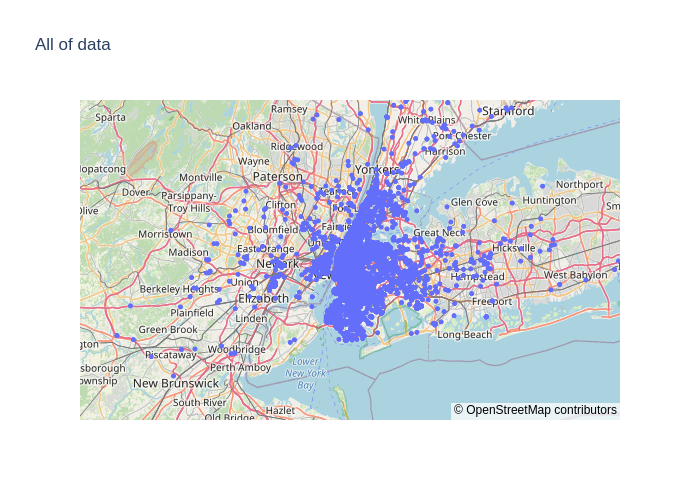

In [6]:
fig = px.scatter_mapbox(lat=df['Lat'],lon=df['Lon'],mapbox_style = 'open-street-map',title='All of data')
# fig.show(renderer='notebook')
fig.show('png')

In [7]:
X = df[['Lat','Lon']]
X = X.values

DBSCAN CLUSTERING

In [8]:
df_scan = df.copy()

scanner = DBSCAN(eps=0.01,min_samples=100,metric='euclidean')
scanner.fit(X)
df_scan['cluster'] = scanner.labels_
fig = px.scatter_mapbox(data_frame=df_scan,lat=df_scan['Lat'],lon=df_scan['Lon'],color='cluster',mapbox_style = 'open-street-map',title='Dbscan clustering')
# fig.show(renderer='notebook')


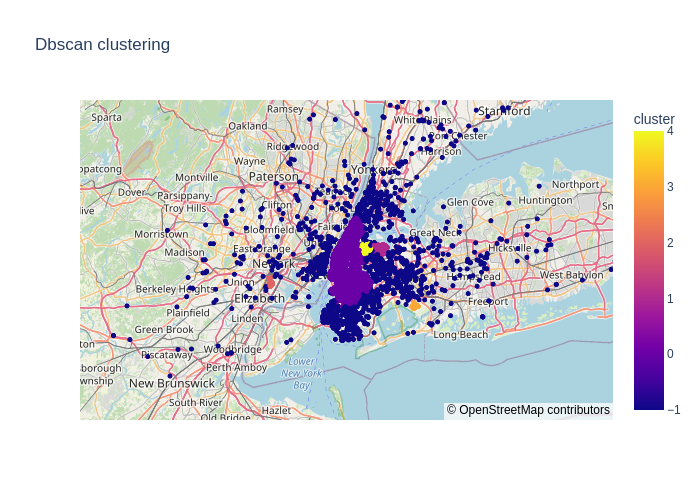

In [9]:
fig.show('png')

KMEANS CLUSTERING

In [10]:
df_kmeans= df

/tmp/ipykernel_688/1825277940.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



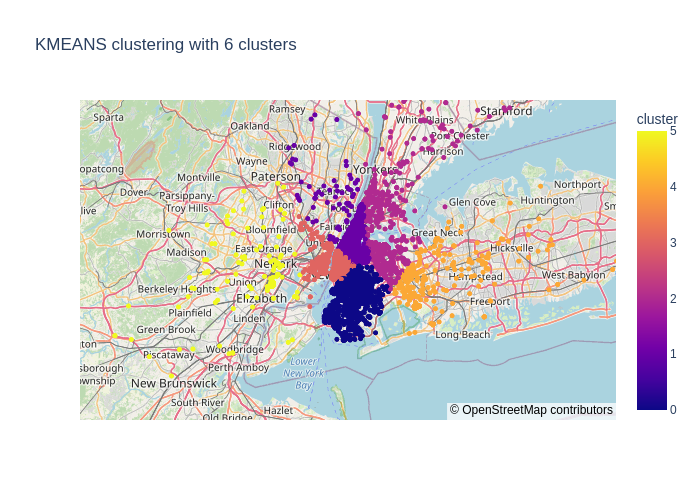

In [11]:
kmeans = KMeans(n_clusters= 6, init = "k-means++", random_state = 0)
kmeans.fit(X)
df_kmeans['cluster'] = kmeans.labels_
fig = px.scatter_mapbox(data_frame=df_kmeans,lat=df_kmeans['Lat'],lon=df_kmeans['Lon'],color='cluster',mapbox_style = 'open-street-map',title='KMEANS clustering with 6 clusters')
# fig.show(renderer='notebook')
fig.show('png')